In [93]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import math
import numpy as np
import matplotlib.pyplot as plt

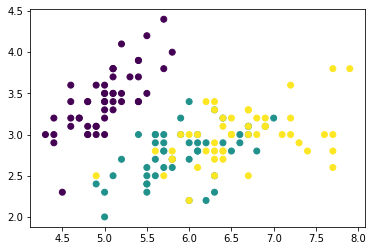

In [96]:
iris = datasets.load_iris()
data = iris.data
target = iris.target
plt.scatter(data[:,0],data[:,1], c=y)

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size = 0.3)

In [91]:
def euclidean_distance(x, X):
  return math.sqrt(np.sum((x - X)**2))

class KNN:

  def __init__(self, k=3):
    self.k = k

  def fit(self, X_train, Y_train):
    self.X_train = X_train
    self.Y_train = Y_train

  def predict(self, X):
    return np.array([self._predict(x) for x in X])

  def _predict(self, x):
    #euclidean distance
    distance_list = [euclidean_distance(x, x_train) for x_train in self.X_train]

    #sort. distance and get index
    index = np.argsort(distance_list)[:self.k]

    #get labels from index
    k_nearest_labels = [self.Y_train[idx] for idx in index]

    #most repeated one
    highest_common = Counter(k_nearest_labels).most_common(1)
    return highest_common[0][0]



In [92]:
knn = KNN(3)
knn.fit(X_train, Y_train)
predicted_labels = knn.predict(X_test)
acc = accuracy(predicted_labels, Y_test)

0.9777777777777777